# bloc

## concept programming notepad

Concept programming here does not mean the term by Alexsandr Stepanov here: https://en.wikipedia.org/wiki/Concept_(generic_programming)

CP is a programming model described in the works of Enn Heraldovich Tyugu about model-based software development. The common idea is about making domain models described the problem in a wide in form of relation networks, and automatic program code synthesis from specifications, which works over these networks to solve concrete tasks.

* http://www.cs.ioc.ee/~tyugu/
* [Концептуальное программирование](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5)


* J. Symbolic Computation (1988) 5, 359-375\
**The Programming System PRIZ**\
G.Mints, E.Tyugu,\
Institute of Cybernetics, Estonian Academy of Sciences,Tallinn
200108, USSR\
[pdf](https://www.academia.edu/18315153/The_programming_system_PRIZ?auto=download)
* Э.Х. Тыугу **Концептуальное программирование**. М.: Наука, 1984. 255 с

```
TO: tyugu@ieee.org
```

> I'm interested in experimenting with mixing your CP approach and Marvin Minsky frame model for commercial, 
> mobile, and embedded software & hardware (IoT) systems development. The site has a lot of materials and links on 
> the theme, but I'd like to track discussions of people involved in current works on concept programming.


In this working bloc (as [c]oding [blo]g) you can find a lot of concrete applications of CP methodology interleaved with huge amount of thinking about all projects I worked on from the end of 2019 as a freelancer and **legacy raker** (*).

### legacy \[code\]raker

I introduce the new programming-related profession: the **legacy \[code\]raker**: a specially dedicated specialist which has a target of old software projects reborning and support.

## metaL: \[meta\]programming \[L\]anguage and Marvin Minsky frame model

The core of my CP system is a homoiconic model uses directed graphs of objects as both program and data representation. The idea was inherited from Marvin Minsky's book: Frames for data representation, which I extended with the ability to store not only slots (attributes) but also hold any frames in an ordered container.

* https://www.youtube.com/watch?v=nXJ_2uGWM-M

Frames originated as a technology used for knowledge representation in artificial intelligence. They are very close to objects and class hierarchies in object-oriented languages although their fundamental design goals are different. Frames are focused on the explicit and intuitive representation of knowledge whereas objects focus on encapsulation and information hiding. Original Marvin Minsky's concept *lacks some principal features for software design*, so I must extend it with ability to **store sequential collections**.

In practice, the techniques and capabilities of the frame model and object-oriented languages overlap significantly so much as we can treat frames not only a native superset of OOP but they drastically extend object design concepts wider: we can represent any knowledge in frames, and use any programming paradigms as we desire.



In [1]:
%%writefile metaL.py

import os,sys
from graphviz import Digraph

Overwriting metaL.py


In [2]:
%%writefile -a metaL.py

# Marvin Minsky's extended frame model
class Frame:
    def __init__(self,V):
        # type/class tag
        # this field is required for literal parsing by PLY library 
        self.type = self.__class__.__name__.lower()
        # scalar data value in implementation language type
        # mostly names the frame, but also can store things like numbers and strings
        self.val  = V
        # slots = attributes = string-keyed associative array
        self.slot = {}
        # ordered storage = AST nested elemens = vector = stack = queue
        self.nest = []

Appending to metaL.py


The presence of an ordered collection is definitively required for representing any program source code, as this is very close to classical attribute grammar -- attributed trees and graphs. The object graph (frame) representation of a program as a primary form is much more effective and native for any work involved with source code transformations: synthesis, modifications, analysis, cross-language translation, etc.

Factically, we don't need any text programming languages at all, as these objects graphs I call **Executable Data Structure** can 
* hold any program statically (on storage), 
* can be executed by a **model EDS-interpreter**, 
* translated into any mainstream languages, and 
* \[cross-\]compiled into machine code.

In [3]:
%%writefile -a metaL.py

# class Frame:

    # dump and plot
    
    # callback for print
    def __repr__(self):
        return self.dump()
    # full tree-form dump
    def dump(self,depth=0,prefix='',voc=True,stack=True,test=False):
        # subtree header
        tree = self._pad(depth) + self.head(prefix=prefix,test=test)
        # infty recursion block
        if not depth: Frame._dumped = []
        if self in Frame._dumped: return tree + ' _/'
        else: Frame._dumped.append(self)
        # slots
        if voc:
            for i in self.slot:
                tree += self.slot[i].dump(depth+1,prefix='%s = '%i,test=test)
        # nested as subtrees
        if stack:
            for j in self.nest:
                tree += j.dump(depth+1,test=test)
        # resulting subtree
        return tree
    # short-form dump: <T:V> header only
    def head(self,prefix='',test=False):
        header = '%s<%s:%s>' % (prefix,self.type,self._val())
        if not test: header += ' @%x' % id(self)
        return header
    # pad tree with tabs with given depth
    def _pad(self,depth):
        return '\n' + '\t' * depth
    # .val can be non-string and must be overloaded in some frame classes
    def _val(self):
        return '%s' % self.val

Appending to metaL.py


In [4]:
%%writefile -a metaL.py

# class Frame:

    # operators
    
    # A[key]
    def __getitem__(self,key):
        return self.slot[key]
    # A[key] = B
    def __setitem__(self,key,that):
        self.slot[key] = that ; return self
    # A << B --> A[B.val] = B
    def __lshift__(self,that):
        self[that.val] = that ; return self
    # A // B
    def __floordiv__(self,that):
        self.nest.append(that) ; return self


Appending to metaL.py


In [5]:
%%writefile -a metaL.py

# class Frame:

    # stack manipulations

    ## ( a b -- a )
    def pop(self):
        return self.nest.pop(-1)
    ## ( a b -- b )
    def pip(self):
        return self.nest.pop(-2)
    ## ( a b -- a b )
    def top(self):
        return self.nest[-1]
    ## ( a b -- a b )
    def tip(self):
        return self.nest[-2]
    ## ( a b -- )
    def dropall(self):
        self.nest = [] ; return self    

Appending to metaL.py


## pytest

I prefer to use `pytest` unit testing framework: it is simple and light.

* https://www.guru99.com/pytest-tutorial.html
* (ru) https://habr.com/ru/post/269759/
* (ru) https://medium.com/@dmrlx/%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-pytest-cc6175c7d0dc

In [6]:
%%writefile -a metaL.py

# class Frame:

    # method returns simplified tree dump for py.tests
    def test(self,voc=True):
        return self.dump(voc=voc,test=True)

Appending to metaL.py


This method provides simplified dump to compare it with constant string in tests.

In [7]:
from metaL import *

In [8]:
# demo / tests for core Frame

print( Frame('Hello') // Frame('World') << Frame('slot') )


<frame:Hello> @7f039060aa90
	slot = <frame:slot> @7f039060ab70
	<frame:World> @7f039060ab00


It is not good to use the sample code as above to show how some software library works. The widely adopted method, which is required to write any production software is testing. Tests also show every feature of a library, how to use it, how not to use it, what preparations must be done, and what input formats are needed.

In [9]:
%%writefile test_metaL.py

import pytest

from metaL import *

class TestFrame:
    
    def setup(self):
        self.hello = Frame('Hello') // Frame('World') << Frame('slot')

    def test_empty(self):
        assert Frame('').test() == '\n<frame:>'

    def test_hello(self):
        assert self.hello.test() == \
            '\n<frame:Hello>\n\tslot = <frame:slot>\n\t<frame:World>'
        
    def test_operators(self):
        assert self.hello['slot'].test() == '\n<frame:slot>'

Overwriting test_metaL.py


In [10]:
!py.test -v test_metaL.py

============================= test session starts ==============================
platform linux -- Python 3.5.3, pytest-5.2.1, py-1.8.0, pluggy-0.13.0 -- /home/ponyatov/bloc/bin/python3
cachedir: .pytest_cache
rootdir: /home/ponyatov/bloc
collected 3 items                                                              

test_metaL.py::TestFrame::test_empty PASSED                              [ 33%]
test_metaL.py::TestFrame::test_hello PASSED                              [ 66%]
test_metaL.py::TestFrame::test_operators PASSED                          [100%]

============================== 3 passed in 0.08s ===============================


## Why Python? What about the technology stack

### Python

Python is **great for prototyping** software systems:

* easy to learn and use programming language, 
* available on many systems including embedded (https://micropython.org/), 
* has a huge amount of ready to use libraries (batteries included).
* does not need complex installations (`python3 -m venv .` is not complex)
* very light in run from scratch (no JVM heat up)

### Nim

* https://nim-lang.org/
* https://forum.nim-lang.org/

Nim got a first 1.0 release less then month ago, so it is not good for enterpreise programming.
* https://forum.nim-lang.org/t/5347

But I'm going to use it especially for this role:
* there is no any heavy runtime (JVM/CLR, huge gigabytes of standard libraries)
* extra portable (Win/Mac/Linux, Android NDK, MIPS/ARM embedded)
* very fast compiling
* tight integration with C/C++ -- it uses C compiler as a backend, and **tranlate**s .nim for .c
  * there are no any problems to fastly write C interfacing code to use any C(++) libraries

It looks for me as a technology very interesting for the small business market, where there are no resources to rent or invest in hardware and expensive software for huge processing with Java hell etc. I don't speak about the full replacement of Java (yet?), but the ability to work both standalone and in symbiosis with existing systems.

What features of Nim look target-yummy:

* **portability**: software already able to work on any meaningful hardware platforms
* compactness and **extra low resource requirements**: there is no any xVM and giant runtime required even to run the HelloWorld, you can run a simple accounting system which will eat a few megabytes of RAM only
* **metaprogramming**: there is a huge amount of repeating code and design patterns in business software, meta is able to simplify and automate some repeating snippets

PS: Maybe someone can advise me on some good manuals and tutorials on enterprise development patterns and business software architecture?

#### What is the future of the Nim programming language now?

https://www.quora.com/What-is-the-future-of-the-Nim-programming-language-now/answer/Dmitry-Ponyatov

Nim looks very attractive for Python programmers who want to push their software system prototypes into production. Python not so good for use as a platform for high-load applications, and does not have any good use on mobile devices (Android etc) as it is too slow, too resource-hungry, and has a lot of problems with system-level integration.

While Nim has semantics close to Python, it is portable for a lot of platforms, has no notable resource consumptions for runtime, and has tight and easy integration with any C(++) frameworks, libraries, and system API.

**Nim is not mature now, but** bundled with a Python as a production-stage platform **it has a very good perspective to kickass even the Java in part of enterprise applications** (small business solutions where *consumers have no enough money to own high-price JRE infrastructure*).

### Java / C# / Delphi / C++ legacy code rake and integration

Suddenly, there is no way to avoid mainstream languages and their framework/library stacks. There is a huge amount of working code deployed anywhere and runs dozens of years in production (so we got the new IT profession -- coderaker (c). There are areas where we can't use any other stack then already installed: finance, banking, security, medical systems and embedded (ANSI C only, especially MISRA-certified critical applications, and conservator-ill persuasions).

You must know and use all of them, especially if you want to earn money or want to professionally dive into legacy software reborning. Any system you use, as we speak about *concept programming*, must be language-agnostic. As **you write CP system port yourself** making it the way **you need**, it works the same *until we stay at the imperative programming paradigm*. Oops, note that *CP is declarative programming in a big part* -- you define your programming (and hardware design) knowledge database, which holds concepts defined in a declarative way.

### Concept programming is a layer of cross-translation

When you go into contract development, your CP system must provide cross-language and cross-system translation of a legacy system logic.

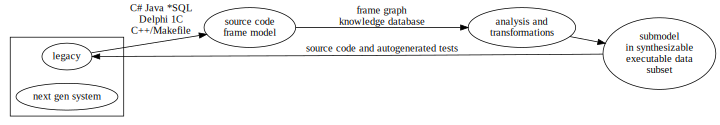

In [11]:
#from graphviz import Digraph
dot = Digraph() ; dot.attr(rankdir='LR',size='10,5')
with dot.subgraph(name='cluster_0') as dotc:
    dotc.node('l','legacy')
    dotc.node('x','next gen system')
dot.node('f','source code\nframe model')
dot.edge('l','f',label='C# Java *SQL\nDelphi 1C\nC++/Makefile')
dot.node('t','analysis and\ntransformations')
dot.edge('f','t','frame graph\nknowledge database')
dot.node('s','submodel\n in synthesizable\n executable data\n subset')
dot.edge('t','s')
dot.edge('s','l','source code and autogenerated tests')
#dot.edge('s','x')
dot

# Core class tree

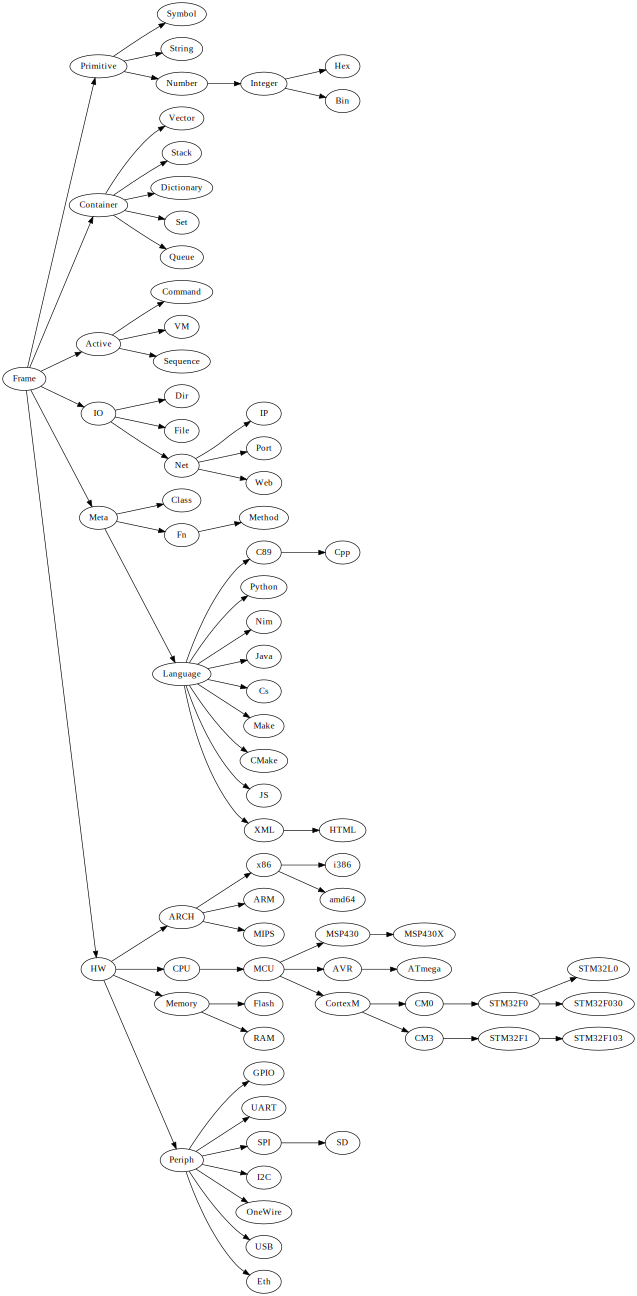

In [12]:
dot = Digraph() ; dot.attr(rankdir='LR',size='10,18')
dot.node('Frame')
dot.edge('Frame','Primitive')
dot.edge('Primitive','Symbol')
dot.edge('Primitive','String')
dot.edge('Primitive','Number') ; dot.edge('Number','Integer')
dot.edge('Integer','Hex') ; dot.edge('Integer','Bin')
dot.edge('Frame','Container')
dot.edge('Container','Vector') ; dot.edge('Container','Stack')
dot.edge('Container','Dictionary') ; dot.edge('Container','Set')
dot.edge('Container','Queue')
dot.edge('Frame','Active')
dot.edge('Active','Command') ; dot.edge('Active','VM') ; dot.edge('Active','Sequence')
dot.edge('Frame','IO')
dot.edge('IO','Dir') ; dot.edge('IO','File') ; dot.edge('IO','Net')
dot.edge('Net','IP') ; dot.edge('Net','Port') ; dot.edge('Net','Web')
dot.edge('Frame','Meta')
dot.edge('Meta','Class') ; dot.edge('Meta','Fn') ; dot.edge('Fn','Method')
dot.edge('Meta','Language')
dot.edge('Language','C89') ; dot.edge('C89','Cpp')
dot.edge('Language','Python') ; dot.edge('Language','Nim')
dot.edge('Language','Java') ; dot.edge('Language','Cs')
dot.edge('Language','Make') ; dot.edge('Language','CMake')
dot.edge('Language','JS')
dot.edge('Language','XML') ; dot.edge('XML','HTML')
dot.edge('Frame','HW')
dot.edge('HW','ARCH') ; dot.edge('ARCH','x86')
dot.edge('x86','i386') ; dot.edge('x86','amd64')
dot.edge('ARCH','ARM') ; dot.edge('ARCH','MIPS')
dot.edge('HW','CPU') ; dot.edge('CPU','MCU')
dot.edge('HW','Memory') ; dot.edge('Memory','Flash') ; dot.edge('Memory','RAM')
dot.edge('MCU','MSP430') ; dot.edge('MSP430','MSP430X')
dot.edge('MCU','AVR') ; dot.edge('AVR','ATmega')
dot.edge('MCU','CortexM') ; dot.edge('CortexM','CM0') ; dot.edge('CortexM','CM3')
dot.edge('CM0','STM32F0') ; dot.edge('STM32F0','STM32L0')
dot.edge('STM32F0','STM32F030')
dot.edge('CM3','STM32F1') ; dot.edge('STM32F1','STM32F103')
dot.edge('HW','Periph') ; dot.edge('Periph','GPIO')
dot.edge('Periph','UART') ; dot.edge('Periph','SPI') ; dot.edge('SPI','SD')
dot.edge('Periph','I2C') ; dot.edge('Periph','OneWire')
dot.edge('Periph','USB') ; dot.edge('Periph','Eth')
dot

### Primitive data

The key property of all primitive objects is they all **evaluate to itself**.

Short names were selected to make dumps readable on the tiny LCD text screens (something like 16x2), and also it means objects subset from the `metaL` core languages.

In [13]:
%%writefile -a metaL.py

# `Primitive` scalar data types
# close to low-level (hardware or implementation language)
class Prim(Frame):
    def eval(self,ctx): # to itself
        ctx // self

# `Symbol` names other objects
class Sym(Prim): pass

# text `String` (multiline)
class Str(Prim): pass

# floating point `Number`
class Num(Prim):
    def __init__(self,V):
        Prim.__init__(self,float(V))

# `Integer` numbers
class Int(Num):
    def __init__(self,V):
        Prim.__init__(self,int(V))

# `Hex`adecimal machine number
class Hex(Int):
    def __init__(self,V):
        Prim.__init__(self,int(V[2:],0x10))
    def _val(self):
        return hex(self.val)

# `Bin`ary string/number
class Bin(Int):
    def __init__(self,V):
        Prim.__init__(self,int(V[2:],0x02))
    def _val(self):
        return bin(self.val)

Appending to metaL.py


In [14]:
%%writefile -a metaL.py

# data `Container`s
class Cont(Frame): pass

# ordered variable-size `Vector`
class Vector(Cont): pass

# LIFO: push/pop interface
class Stack(Cont): pass

# FIFO: put/get interface
class Queue(Cont): pass

# associative array
class Dict(Cont): pass

# single-element
class Set(Cont): pass


Appending to metaL.py


In [15]:
%%writefile -a test_metaL.py

class TestPrimitive:

    def test_symbol(self):
        assert Sym('test').test() == '\n<sym:test>'


Appending to test_metaL.py


# EDS: Executable Data Structure (c)

* https://www.quora.com/What-is-graph-oriented-programming/answer/Dmitry-Ponyatov


#### What is graph oriented programming?

Let’s see `Lisp` — it is *based on lists*, **all data and especially code are lists**.

Now let **think about graphs made of some objects as a program representation**. We can take any programming language as a base, for example C. We can parse some source code, split then into syntax elements, and build parsing tree from them. The tree is a *graph*, every node is an *object*, nodes *linked by references* as graph edges. Every node can have arbitrary *attributes* addressed by names -- Marvin Minsky call them *slots*.

As a sample, this is source code in Python shows the base graph object:
```py
class Frame:
  def __init__(self,V):
    self.type = self.__class__.__name__.lower()
    self.val = V
    self.slot = {}
    self.nest = []
```

To make a *programming system* **does not use any programming languages**, but *only graphs in memory*, we should inherit this class to two classes:

```py
class VM(Frame):
  def __lshift__(self,F):
    if callable(F): return self << Cmd(F)
    else: return Frame.__lshift__(self,F)
 
class Cmd(Frame):
  def __init__(self,F):
    Frame.__init__(self,F.__name__)
    self.fn = F
  def eval(self,ctx):
    self.fn(ctx)
 
vm = VM('metaL') ; print(vm)

def BYE(ctx): sys.exit(0)
vm << BYE

print(vm)
```

Now we have global context vm
```
<vm:metaL> @7f5bc7e2a5f8
   BYE = <cmd:BYE> @7f5bc7f5e320
```

It has two properties required to implement a programming system (language):

* the **lookup table** (environment, *vocabulary*), and
* **data stack** for storing data in order, and do operations on them

`Cmd` object wraps generic Python **functions which gets execution context as an attribute** and can *do any arbitrary operation on this context*.

*Adding a dozen of inherited classes* to represent primitives (symbol, string, number), and some objects evaluate as control structures (if, case, loops, etc) *we got a programming system*. **It is not required to use programming language**, as this system can use any graph manipulation interfaces (gui,web) to construct new graphs by running existing ones.

This classical code
```c
int _fib(int n, int acc) {
    if (n==0) return acc;
    return _fib(n-1,acc*n)
}
 
int fib(int n) { return _fib(n,1) }
```
transforms to **executable data structure** which can both represent “code” and **be run in a system* by the *EDS-interpreter*

![image.png](attachment:image.png)

## *Homoiconic* programming system

**Homoiconicity** is a property of a programming language in which *any program is* **simultaneously**
* *the easy to modify* **data structure** , and 
* an **executable program representation** (program source code).

In a homoiconic language, a programmer does not just have access to the source code, but the language itself specifically provides tools and easy to use methods for convenient work with parts of programs (represented as generic data) in runtime.
* Say, if you include C++ source code of your program into the distribution package, you can work with the program code as data, but only at the level of text files, or using third-party analysis libraries. In the C++ language itself, there are no tools for reading, modifying, or generating source code.
* Conversely, in the Lisp language, all programs are represented in the form of executable lists -- *these lists* are simultaneously a representation of the program and the usual *universal data structure for working with which the language was specially created*.

### EDS-interpreter

In order to use the advantages of homoiconicity in your programs written in any conventional languages (C++/Java/C#/...), you need to integrate an **EDS-interpreter** into your programs that will 
* **execute some data structure as a program**, and at the same time 
* provides high-level *tools for modifying it* in runtime.

It is not necessary that this interpreter should be an implementation of some scripting programming language.

Script language interpreters embedded into programs are now widely used to provide the user with the ability to customize and *extend the functionality of programs without its recompilation*. The most famous example is game engines:
* the program core is written in C++ or any other language which generates highly-efficient machine code
* the game itself is written in some scripting languages such as Lua, Python, JavaScript,..

The most interesting thing: **it is possible to do programming without using any programming language** -- it is enough that the system has a **data structures interpreter**: that's the core of **EDS method** (Executable Data Structure). To create a program in such a system, you need to have any way to create an executable data structure in memory: it can be a graphic drawing, a text format parser, a graph database, or C++ code that forces the compiler to include such a structure in the executable file statically.

# Metaprogramming

Metaprogramming -- when one program modifies (generates) another program, including itself.

**Metaprogramming is a method of boosting your efficiency as a programmer by expanding the language you use**. If you write very similar code every day, in languages ​​that can do meta (Lisp, Nim), you can write small macro programs that will run during the compilation of the code (Nim), and generate new code from a template or modify an existing one the way as you need it. Factically, you can add to the language those features that are needed for a narrow set of *your specific tasks*.

In order **to be able to use metaprogramming in a full scale**, the language or **programming system you are using must be homoiconic**. If you want to use this method with industrial programming languages, the use of an EDS interpreter will allow you to quickly and conveniently solve your problems, paying for it with losses in the speed of programs and memory usage (see a comparison of the interpreter vs the compiler into machine code).

# Generic program representation

Well-known forms of program representations:
* **machine code**
* **source code in** some language (**text files**) -- practically all programming languages from mainstream ones in industrial use, down to experimental and esoteric
* dynamical **lists** -- the Lisp

`metaL` (**meta L**anguage) also offers another form:
* object graphs -- `metaL`

A **graph** is a mathematical concept, and a data structure is very widely used in programming.

The graph consists of vertices -- nodes, and edges that connect the nodes to each other. A **directed graph** is a special case of a graph in which a direction is given for each edge and the start and end nodes are known.

An **object** is a data item that links
* a set of data *fields* that specify the state of the object
* *methods* for working with these data, and with the object itself as a single entity

Finally, the **object graph** is a data structure in which
* nodes are **objects**, and
* edges are defined as **references** from an object to other objects.\
It is clear that the object graph is **directed**, and **can be cyclic** (the object refers to itself)

## Frame as a universal data element

Each object graph node aka **Frame is a universal data container**.
* `type` indicates the type of frame, which is also displayed to the user. This field is required for languages that do not support RTTI: they are not able to determine the type of an arbitrary object dynamically during program execution. Python has a built-in function `isinstance()`, but this field also appeared due to the requirements of the [PLY library](https://www.dabeaz.com/ply/).
* `val` contains data that distinguishes one frame from another: the name of the frame, or some scalar value
* `slot` stores named links to other frames -- it sets edges of the object graph via references
* `nest` is an ordered data container that was not in the original Minsky frames, but it is necessary for parsing text formats (nested elements of the parsing tree), and for use as a stack (LIFO) and queue (FIFO)

Any node can store any other data packed in additional fields -- it is enough to inherit a new class from the base Frame, if dynamic languages like Pyhon frame object can be extended unlimited.

# EDS: Executable Data Structure (c) approach

In [16]:
%%writefile -a metaL.py

# classes subset required to implement EDS: Executable Data Structure (c)
class Active(Frame): pass

Appending to metaL.py


In [17]:
%%writefile -a metaL.py

# VM `Command` which wraps Python function(context)
class Cmd(Active):
    # use function name as .val
    def __init__(self,F):
        Active.__init__(self,F.__name__)
        self.fn = F
    # apply stored function to context
    def eval(self,ctx):
        self.fn(ctx)        

Appending to metaL.py


In [18]:
%%writefile -a metaL.py

# context = virtual machine
# represents FORTH-like execution context: vocabulary + stack + set of commands works over VM state
class VM(Active):
    ## operator methods specially dedicated for wrapping Python functions
    def __setitem__(self,key,F):
        if callable(F): self[key] = Cmd(F) ; return self
        else: return Active.__setitem__(self,key,F)
    def __lshift__(self,F):
        if callable(F): return self << Cmd(F)
        else: return Active.__lshift__(self,F)

# `Sequence`: every element in nest[] executes one by one on a single provided context
class Seq(Active,Vector): pass

Appending to metaL.py


In [19]:
%%writefile -a metaL.py

# global FORTH-like virtual machine

vm = VM('metaL') ; vm['vm'] = vm

# BYE ( -- ) stop system
def BYE(ctx): sys.exit(0)
vm << BYE

Appending to metaL.py


In [20]:
%%writefile py.py
from metaL import *
print(vm)

Overwriting py.py


In [21]:
!python py.py


<vm:metaL> @7f8d087470f0
	vm = <vm:metaL> @7f8d087470f0 _/
	BYE = <cmd:BYE> @7f8d08756a20


## Debug

In [22]:
%%writefile -a metaL.py

# debug

# ? ( -- ) print current VM stack and continue execution
def Q(ctx): print(ctx.dump(voc=False))
vm['?'] = Q

# ?? ( -- ) print full VM state and stop the system
def QQ(ctx): print(ctx) ; BYE(ctx)
vm['??'] = QQ

Appending to metaL.py


## Stack operations

In [23]:
%%writefile -a metaL.py

# stack operations

# . ( a b c -- ) drop all data from the stack
def DOT(ctx): ctx.dropall()
vm['.'] = DOT

Appending to metaL.py


**Use `.` word at the end of every logical code block** in your scripts -- it will save you from surprises.

## PLY-based parser: There is no-syntax 

FORTH-based languages are no-syntax languages: it uses only more or less simple lexer, but there is no syntax predefined structures which must be parsed. Every language element implements control or compiling structures has its own responsibility on required work and no of this work interlinked with the parser.

Due to language syntax simplicity, it is very easy and fast to make a usable command shell system: you need a very compact parser, and tiny set of words (functions) provides interpreter and command definition capabilities. To make the bootstrap version of a metaprogramming system we don't need more than that simple command shell: what we need only is an initialization from ASCII text files, and little command language provided to a user.

I tend to totally avoid any scripting languages use. If you look a lot of publications and manuals on expert system design, there are a lot of cryptic Lisp/Prolog code defines knowledge databases and rules. But it is not required to have scripting, as data stored in the *object graph database* itself has a power of describing processing procedures and rules. It looks like [MPS: The Domain-Specific Language Creator by JetBrains](https://www.jetbrains.com/mps/) where data defines not only structures, but its (self)transformations.

From the other side, it is a very common case to have human-readable ASCII formats for batching data loading and transformation, so I leave very primitive FORTH-like command language for these tasks. 

First of all, I must be compatible with git hostings wide use like GitHub etc and don't want to have problems like image-based Smalltalk systems. Frame graphs are great for visualization, but text files good for easy to use storage can be read by a human, edited and recovered manually. Here I especially want to note that `metaL` is not a **visual** language/system, but this is a **visualizable programming** system.

The difference is a user use case: you will not break your hands with hours of a mouse juggling. In place of that, you'll get a simple command-line shell, and interface which will show you your data structures in a pleasant human-friendly graph and diagrams representation. FORTH-like command (not programming) language so simple in its roots, that it is even useful on narrow screen mobile phones. You don't fly around the screen as you do with most other script languages -- there is no recursion syntax, as result you don't need to fix your code saving parens balance or right tabbing.

In [24]:
%%writefile -a metaL.py

# no-syntax parser

import ply.lex as lex

tokens = ['sym','num','int','hex','bin']

t_ignore = ' \t\r\n'
t_ignore_comment = r'[\#\\].*'

def t_hex(t):
    r'0x[0-9a-fA-F]+'
    return Hex(t.value)

def t_bin(t):
    r'0b[01]+'
    return Bin(t.value)

def t_num(t):
    r'[+\-]?[0-9]+\.[0-9]*([eE][+\-][0-9]+)?'
    return Num(t.value)

def t_num_exp(t):
    r'[+\-]?[0-9]+[eE][+\-][0-9]+'
    return Num(t.value)

def t_int(t):
    r'[+\-]?[0-9]+'
    return Int(t.value)

def t_sym(t):
    r'(`)|[^ \t\r\n\#\\]+'
    return Sym(t.value)

def t_error(t): raise SyntaxError(t)

Appending to metaL.py


In [25]:
%%writefile -a test_metaL.py

class TestParser:
    
    def setup(self):
        self.lexer = lex.lex()
        self.lexer.input('`symbol -01 +02.30 -04e+5 0xDeadBeef 0b1101')
    
    def test_parser(self):
        assert self.lexer.token().test() == '\n<sym:`>'
        assert self.lexer.token().test() == '\n<sym:symbol>'
        assert self.lexer.token().test() == '\n<int:-1>'
        assert self.lexer.token().test() == '\n<num:2.3>'
        assert self.lexer.token().test() == '\n<num:-400000.0>'
        assert self.lexer.token().test() == '\n<hex:0xdeadbeef>'
        assert self.lexer.token().test() == '\n<bin:0b1101>'

Appending to test_metaL.py


In [26]:
!pytest -v test_metaL.py::TestParser

============================= test session starts ==============================
platform linux -- Python 3.5.3, pytest-5.2.1, py-1.8.0, pluggy-0.13.0 -- /home/ponyatov/bloc/bin/python3
cachedir: .pytest_cache
rootdir: /home/ponyatov/bloc
collected 1 item                                                               

test_metaL.py::TestParser::test_parser PASSED                            [100%]

============================== 1 passed in 0.09s ===============================


## Interpreter

In [27]:
%%writefile -a metaL.py

# interpreter

## ( -- str:token )
def WORD(ctx):
    token = ctx.lexer.token()
    if token: ctx // token
    return token
vm['`'] = WORD

## ( str:token -- some:object | notfound:token )
def FIND(ctx):
    token = ctx.pop()
    try: ctx // ctx[token.val] ; return True
    except KeyError: ctx // token ; return False

## ( any:object -- ... )
def EVAL(ctx):
    ctx.pop().eval(ctx)

## ( str -- )
def INTERP(ctx):
    ctx.lexer = lex.lex() ; ctx.lexer.input(ctx.pop().val)
    while True:
        if not WORD(ctx): break
        if isinstance(ctx.top(),Sym):
            if not FIND(ctx): raise SyntaxError(ctx.top())
        EVAL(ctx)

# run commands from Jupyter as strings
def M(cmd=''):
    vm // Str(cmd) ; INTERP(vm)

Appending to metaL.py


With M() calls you now able to run metaL commands right in Jupyter notebook

In [28]:
%load_ext autoreload
%autoreload 2
from metaL import *

In [29]:
! touch metaL.py

In [30]:
from metaL import *
M('-01 +02.30 -4e+5 0xDeadBeef 0b1101 ? . ? \ number literals')


<vm:metaL> @7f03901ca128
	<int:-1> @7f03900d3278
	<num:2.3> @7f03900d3048
	<num:-400000.0> @7f03900d3438
	<hex:0xdeadbeef> @7f03900d3080
	<bin:0b1101> @7f03900d3470

<vm:metaL> @7f03901ca128


## Vocabulary Compiler

## System initialization

In [31]:
%%writefile metaL.ini

# metaL system
\ line comment

`symbol -01 +02.30 -4e+5 0xDeadBeef 0b1101 ? . ? \ number literals


Overwriting metaL.ini


In [32]:
%%writefile -a metaL.py

# system init

if __name__ == '__main__':
    with open(sys.argv[0][:-3]+'.ini') as ini: # process metaL.ini
        M(ini.read())

Appending to metaL.py


In [33]:
!python metaL.py


<vm:metaL> @7efdafad0908
	<sym:symbol> @7efdafa5d240
	<int:-1> @7efdafa5def0
	<num:2.3> @7efdafa5d748
	<num:-400000.0> @7efdafa5d780
	<hex:0xdeadbeef> @7efdafa5d2e8
	<bin:0b1101> @7efdafa5d8d0

<vm:metaL> @7efdafad0908


In [34]:
%%writefile -a test_metaL.py

class TestInterpreter:
    
    def setup(self):
        self.lexer = lex.lex()

    def test_numbers(self):
        vm.dropall()
        M('`symbol -01 +02.30 -4e+5 0xDeadBeef 0b1101 \ number literals')
        assert vm.test(voc=False) == '\n<vm:metaL>\n\t<sym:symbol>\n\t<int:-1>'+\
                                     '\n\t<num:2.3>\n\t<num:-400000.0>'+\
                                     '\n\t<hex:0xdeadbeef>\n\t<bin:0b1101>'

Appending to test_metaL.py


In [35]:
! pytest -v test_metaL.py::TestInterpreter

============================= test session starts ==============================
platform linux -- Python 3.5.3, pytest-5.2.1, py-1.8.0, pluggy-0.13.0 -- /home/ponyatov/bloc/bin/python3
cachedir: .pytest_cache
rootdir: /home/ponyatov/bloc
collected 1 item                                                               

test_metaL.py::TestInterpreter::test_numbers PASSED                      [100%]

============================== 1 passed in 0.09s ===============================


# Android

[Android intro (ru) (c) mail.ru](https://www.youtube.com/playlist?list=PLrCZzMib1e9ptI7bPXFG8X5xEiCBt5qYE)

What file structures Android Studio creates on project startup? How many of these files you are changing over and over again on the next project you are starting? Can we automate it by providing a conceptual project declarative description, and then produce the Android project structure via code generation? Is it possible to make a *code fabric framework* from scratch which will totally replace almost all Java coding by **your own software specification language**?

## Android application components

**Activity** is a Java class that processes part of application related to View part of the MVC model.

**Layout** is an XML file contains a specification of a single app screen. The app can have large amount of activities each of them is specific not only for every use case but for screen orientations, resolution and device type (TV, wearing).

### ./app/src/main/AndroidManifest.xml

```
<manifest
    <application
        android:icon="@mipmap/ic_launcher"
        android:roundIcon="@mipmap/ic_launcher_round"
        android:label="@string/app_name"
        <activity android:name=".MainActivity">...</activity>
```

We need here to have control on launcher icons, application name, and set of activities.

To run application you must have default activity defined:
```
        <activity android:name=".MainActivity">
            <intent-filter>
                <action android:name="android.intent.action.MAIN" />
                <category android:name="android.intent.category.LAUNCHER" />
            </intent-filter>
        </activity>
```

### ./app/src/main/res/layout/activity_main.xml

### ./app/src/main/java/io/github/ponyatov/alog/MainActivity.java

```java
public class MainActivity extends AppCompatActivity {
    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_main);
    }
}
```

# Resources

## Icons

```
app/src/main/res/mipmap-anydpi-v26/ic_launcher_round.xml: XML 1.0 document, ASCII text
app/src/main/res/mipmap-anydpi-v26/ic_launcher.xml:       XML 1.0 document, ASCII text
app/src/main/res/mipmap-hdpi/ic_launcher.png:             PNG image data, 72 x 72, 8-bit/color RGBA
app/src/main/res/mipmap-hdpi/ic_launcher_round.png:       PNG image data, 72 x 72, 8-bit/color RGBA
app/src/main/res/mipmap-mdpi/ic_launcher.png:             PNG image data, 48 x 48, 8-bit/color RGBA
app/src/main/res/mipmap-mdpi/ic_launcher_round.png:       PNG image data, 48 x 48, 8-bit/color RGBA
app/src/main/res/mipmap-xhdpi/ic_launcher.png:            PNG image data, 96 x 96, 8-bit/color RGBA
app/src/main/res/mipmap-xhdpi/ic_launcher_round.png:      PNG image data, 96 x 96, 8-bit/color RGBA
app/src/main/res/mipmap-xxhdpi/ic_launcher.png:           PNG image data, 144 x 144, 8-bit/color RGBA
app/src/main/res/mipmap-xxhdpi/ic_launcher_round.png:     PNG image data, 144 x 144, 8-bit/color RGBA
app/src/main/res/mipmap-xxxhdpi/ic_launcher.png:          PNG image data, 192 x 192, 8-bit/color RGBA
app/src/main/res/mipmap-xxxhdpi/ic_launcher_round.png:    PNG image data, 192 x 192, 8-bit/color RGBA
```

https://romannurik.github.io/AndroidAssetStudio/

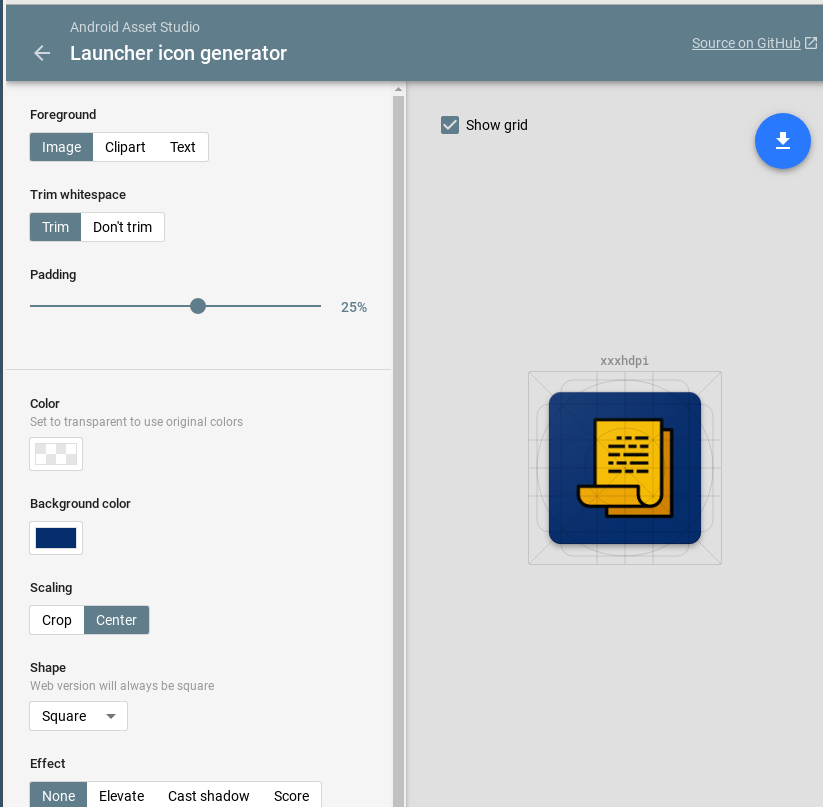

# Programming learning: what is more effective?

Programming learning: what is more effective -- classical books, tutorials, and video curces on YouTube, or others projects source code analisys&

# Learing workflow

* platforms
  * Android
* languages
  * Java (Android)
  * Python (web)
  * C#
  * PHP (legacy)
* Web
  * JavaScript
    * Bootstrap
    * Angylar
    * Vue
* data storage
  * Postgres
  * Queue
    * MQTT
    * RabbitMQ
  * Apache stack
    * Kaffka
    * Redis
    * Spark
* technologies
  * neural network apps
  * execitable data structure development
* domain
  * small business accounting
  * unit marketing
* embedded
  * Raspberry Linux
  * IoT
    * backend
    * nodes
      * Cortex-M MCU (STM32)
  * HW design
    * KiCAD
    * FreeCAD
    * FPGA

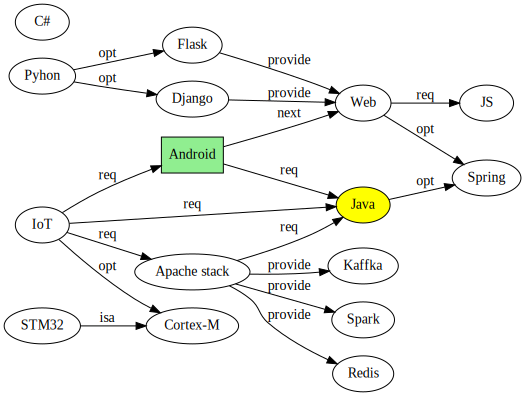

In [36]:
from graphviz import *
work = Digraph() ; work.attr(rankdir='LR')
android = work.node('Android',shape='box',fillcolor='lightgreen',style='filled')
java = work.node('Java',fillcolor='yellow',style='filled')
work.edge('Android','Java',label='req')
cs = work.node('C#')
js = work.node('JS') ; web = work.node('Web') ; work.edge('Web','JS',label='req')
work.edge('Android','Web',label='next')
work.edge('Apache stack','Java',label='req')
work.edge('Apache stack','Kaffka',label='provide')
work.edge('Apache stack','Spark',label='provide')
work.edge('Apache stack','Redis',label='provide')
work.edge('IoT','Apache stack',label='req')
work.edge('IoT','Java',label='req')
work.edge('IoT','Android',label='req')
work.edge('IoT','Cortex-M',label='opt') ; work.edge('STM32','Cortex-M',label='isa')
work.edge('Java','Spring',label='opt')
work.edge('Web','Spring',label='opt')
work.edge('Pyhon','Flask',label='opt') ; work.edge('Flask','Web',label='provide')
work.edge('Pyhon','Django',label='opt') ; work.edge('Django','Web',label='provide')
work

#### C# stays on the ass-side of moon

It looks like C# is not needed, saying more precisely -- C# is required only for legacy systems to be integrated with modern software infrastructure.

If we think about legacy raking, we still need to know it very deep with all frameworks included, just to be ready to adapt and reborn software written by ancients.

### Android first

**Android is the first-stage platform for the newbie freelancer** as it provides:
* live money is sent you directly on every install
* widest user audience -- almost anybody has a mobile phone in a pocket, and **your phone is always with you**
* **Java** as a **req**uired technology


# WASM interpreter machine in Python

#### (c) David Beazley

https://www.youtube.com/watch?v=r-A78RgMhZU

# **11:11** gym for programmers

https://www.youtube.com/watch?v=2mtjzAj34ZA
    
You show a gym room through all the video. Do you know some statical & calisthenics complex adapted for programmer what you can do in an office right near the table? I'm moving to hardcore freelance so having a regular short pauses is critical for eye and spine savings.

I'm experimenting with doing a single very short and simple exercise with **11:11**min interval over all day. Looks comfortable --- it does not break my thinking flow, and my eyes do not leak at the end of the day. What I want now is extending my set with more exercise types doesn't require anything: no space, no weights, only the gravity and kickass timer on the fridge.

**11:11** is the interval I feel optimal: it is not too long leaving my muscles warm, and it can't be shorter as the main work must be done. (a single short exercise per period not longer than one minute)

* https://www.facebook.com/1111tdx/videos/1018346341636965/?v=1018346341636965

# Android model

* Manifest `http://localhost:8889/notebooks/bloc.ipynb`
* Activity `./app/src/main/java/io/github/ponyatov/alog/MainActivity.java`
  * Fragment
* Layout `./app/src/main/res/layout/activity_main.xml`
* Icon (set) `./app/src/main/res/mipmap-*dpi/ic_launcher[_round].png`